# DA Assignment
<h3>Cygnus</h3> <br>
Angelin Ann Jacob - CS 041 <br>
Vivek Sai Chinna - CS 077  <br>
Rongali Lalith Vardhan - CS 337  <br>
Deepa Shree C V - CS 105 


<h2> EDA </h2>

In [1]:
#importing the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error

import statsmodels
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../input/pes-ec-dataanalytics-assign/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1500 non-null   object 
 1   Open    1500 non-null   float64
 2   High    1500 non-null   float64
 3   Low     1500 non-null   float64
 4   Volume  1500 non-null   int64  
 5   Close   1500 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 70.4+ KB


In [4]:
df.head()

,Date,Open,High,Low,Volume,Close
0,14-08-2015,57.484790,58.398406,57.342469,171718000,58.237720
1,17-08-2015,58.274453,59.013611,58.026536,163538800,58.788651
2,18-08-2015,58.453501,58.917197,58.260678,138242800,58.485638
3,19-08-2015,58.301997,58.494820,57.650069,193146000,57.801575
4,20-08-2015,57.374601,57.498558,56.249794,274006400,56.718082


In [5]:
#checking for correlation between the columns
df.corr()

,Open,High,Low,Volume,Close
Open,1.000000,0.999822,0.999744,-0.162110,0.999575
High,0.999822,1.000000,0.999684,-0.155877,0.999777
Low,0.999744,0.999684,1.000000,-0.170326,0.999782
Volume,-0.162110,-0.155877,-0.170326,1.000000,-0.163713
Close,0.999575,0.999777,0.999782,-0.163713,1.000000


In [6]:
#inspecting the null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

# **Forecasting**

<h3>Holt Winters Method:</h3>
The target variable is analysed carefully and when decomposed trend and seasonality are observed. Hence, the above model is used for forecasting. All variations of the model have been tried out to obtain the best results.

<h4>Seasonal Decomposition of the components of the target variable 'Close'<h4>

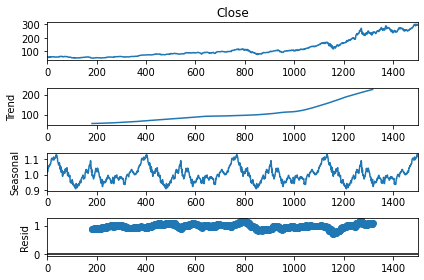

In [7]:
#multiplicative decompositon
sm.tsa.seasonal_decompose(df['Close'],model='multiplicative',period = 365).plot()
result = sm.tsa.stattools.adfuller(df['Close'])
plt.show()

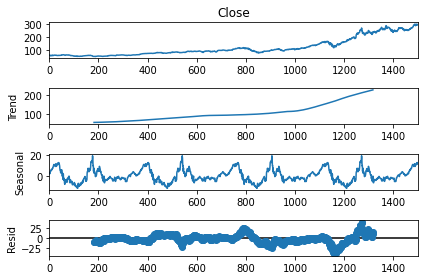

In [8]:
#additive decomposition
sm.tsa.seasonal_decompose(df['Close'],model='additive',period = 365).plot()
result = sm.tsa.stattools.adfuller(df['Close'])
plt.show()

In [9]:
#getting the train and the test data. The last 50 instances are forecasted to calculate the rmse
train = df['Close'][:1450]
test = df['Close'][1450:]

All the four variations are considered to build the model, i.e, the multiplicative and additive models of both trend and seasonality. The model where both the trend and seasonality are additive performs better.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


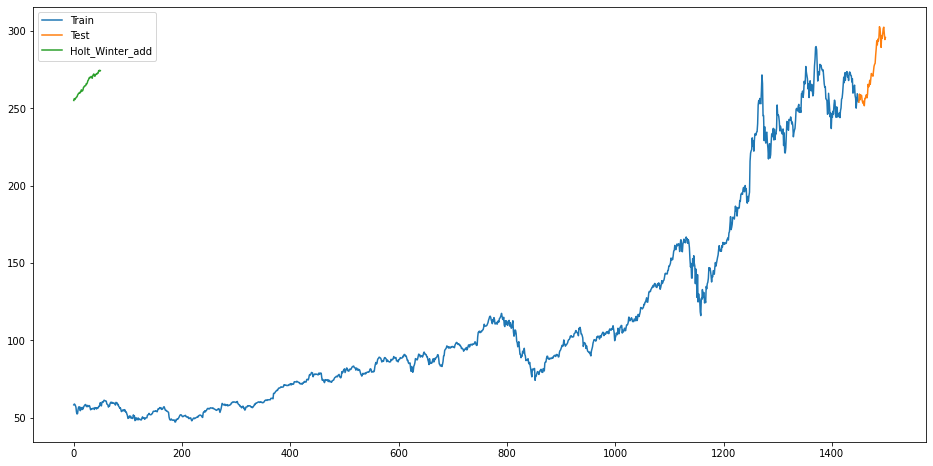

In [10]:
y_hat_avg = test.copy()


fit2 = statsmodels.tsa.holtwinters.ExponentialSmoothing(np.asarray(train),trend='additive',seasonal='additive',seasonal_periods=365).fit()


y_hat_avg['Holt_Winter_add'] = fit2.forecast(steps=len(test))


plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')

plt.plot(y_hat_avg['Holt_Winter_add'], label='Holt_Winter_add')

plt.legend(loc='best')
plt.show()

In [11]:
#calculating the rmse of the model
print(mean_squared_error(test,y_hat_avg['Holt_Winter_add'])**0.5)


15.176313245748693


<h2>Regression</h2>

Linear regression is used because the correlation between the variables is high. Dropping out highly correlated variables, performing PCA gave higher rmse values. Hence all the variables were considered to train the model.Out of all the regression models that were used, linear regression gave the lowest rmse value. A pipeline was used with StandardScaler for preprocessing. 

In [12]:
#date is dropped as it isn't required for prediction
df.drop(['Date'],axis=1,inplace=True)

In [13]:
#getting the predictors and the preidcted variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [15]:
#creating a pipeline to 
pipe = Pipeline([('scaler', StandardScaler()), ('reg', LinearRegression())])

In [16]:
#Training the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [17]:
#making predictions
y_pred = pipe.predict(X_test)

In [18]:
#looking at the actual and the predicted values
pred = pd.DataFrame()
pred['Actual']=y_test
pred['Predicted'] = y_pred
pred.sample(10)

,Actual,Predicted
1465,256.842682,258.844873
937,104.032578,104.233183
681,84.466881,84.808191
483,76.089623,76.467491
461,73.998199,73.810105
529,79.475311,78.948616
47,57.227680,57.782480
563,88.417892,88.394872
649,90.804611,90.869194
1416,248.520889,249.665197


In [19]:
#printing the rmse
print(mean_squared_error(y_test,y_pred)**0.5)

1.0153247265441223


In [20]:
#Importing the test csv files
test = pd.read_csv('../input/pes-ec-dataanalytics-assign/test.csv')

In [21]:
#drop the date and the close columns as they aren't required for making the predictions
test.drop(['Date','Close'],axis=1,inplace=True)

In [22]:
#the predictions are made and stored in res
res = pipe.predict(test)

In [23]:
#the submissions are exported the csv file
sub = pd.read_csv('../input/pes-ec-dataanalytics-assign/sample_submission.csv')
sub['Close'] = res
sub.to_csv('./submission.csv',index=False)

# Conclusions:
As alredy mentioned, the regression model performs better than the forecasting model with a lower rmse on the test data.
This might also be due to the fact that forecasting models take into account only the previous values but regression looks at the other independent variables like Open, High, Low and Volume. This would help in making better predictions.
The Regression pipeline is used to make the final submission due to the above mentioned reasons.